<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#系統樹読み込み" data-toc-modified-id="系統樹読み込み-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>系統樹読み込み</a></span></li><li><span><a href="#情報読み込み" data-toc-modified-id="情報読み込み-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>情報読み込み</a></span><ul class="toc-item"><li><span><a href="#ウイルスに関する情報の表を取得" data-toc-modified-id="ウイルスに関する情報の表を取得-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ウイルスに関する情報の表を取得</a></span></li></ul></li><li><span><a href="#系統樹にヒートマップをつける" data-toc-modified-id="系統樹にヒートマップをつける-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>系統樹にヒートマップをつける</a></span></li><li><span><a href="#ウイルス名と系統樹" data-toc-modified-id="ウイルス名と系統樹-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ウイルス名と系統樹</a></span></li></ul></div>

# read tree file

In [30]:
library(ggtree)
library(ape)
library(phytools)
library(dplyr)

In [31]:
virus = "Flaviviridae"

In [32]:
nwk_f <- "input_examples/Flaviviridae/Flaviviridae.treefile"

In [33]:
phylo <- read.tree(nwk_f)

rooted <- midpoint.root(phylo)
phylo <- ladderize(rooted, F)

In [34]:
phylo


Phylogenetic tree with 2215 tips and 2214 internal nodes.

Tip labels:
  NC_074777, NC_074778, NC_043116, OQ067500, MN057643, OP734238, ...

Rooted; includes branch lengths.

# read metadata

In [35]:
label_f <- "input_examples/final_dataset_phylogenetic_tree_label.txt"

In [36]:
data <- read.csv(file = label_f, sep="\t", encoding='UTF-8', fill=TRUE, quote="",
                          stringsAsFactor=FALSE, header=TRUE)

data$Family[data$Family == "sarbecovirus"] <- "Coronaviridae"
data$Family[data$Family == "influenza_virus"] <- "Orthomyxoviridae"

# extract target viral data
filtered_data <- data %>%
  filter(Family == virus)

# filtered by columns 
col_l <- c("virus_ID", "Genus", "host_label", "dataset", "dnabert", "vibe", "deepac", "kNN", "zoonotic_rank", "Family")
df_seq_info = filtered_data[, col_l]

# remove duplicates
df_seq_info <- unique(df_seq_info)
row.names(df_seq_info) <- df_seq_info$virus_ID

head(df_seq_info)

,virus_ID,Genus,host_label,dataset,dnabert,vibe,deepac,kNN,zoonotic_rank,Family
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AB031663,AB031663,Hepacivirus,1,past,0.9779576,0.92205103,0.90299503,1.0,0.9977125,Flaviviridae
AB049088,AB049088,Hepacivirus,1,past,0.9991270,0.98688346,0.99795904,1.0,0.9977125,Flaviviridae
AB114858,AB114858,Flavivirus,0,past,0.0624041,0.09496223,0.04423943,0.1,0.9977125,Flaviviridae
AB122020,AB122020,Flavivirus,1,past,0.9951889,0.99656347,0.85016342,1.0,0.9977125,Flaviviridae
AB122021,AB122021,Flavivirus,1,past,0.9951850,0.99656402,0.84876408,1.0,0.9977125,Flaviviridae
AB122022,AB122022,Flavivirus,1,past,0.9951987,0.99656457,0.84968242,1.0,0.9977125,Flaviviridae


In [37]:
# Check for duplicate virus_IDs, including the first occurrence
duplicates <- duplicated(df_seq_info$virus_ID) | duplicated(df_seq_info$virus_ID, fromLast = TRUE)

# Show rows with duplicate virus_IDs
df_seq_info[duplicates, ]

virus_ID,Genus,host_label,dataset,dnabert,vibe,deepac,kNN,zoonotic_rank,Family
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


# extract tables

In [38]:
col_l <- c("host_label")
df_host  <- as.data.frame(df_seq_info[, col_l])
rownames(df_host) <- rownames(df_seq_info)
colnames(df_host) <- c("Host")
head(df_host)

,Host
,<dbl>
AB031663,1
AB049088,1
AB114858,0
AB122020,1
AB122021,1
AB122022,1


In [39]:
col_l <- c("Genus")
df_genus  <- as.data.frame(df_seq_info[, col_l])
colnames(df_genus) <- c("Genus")
rownames(df_genus) <- rownames(df_seq_info)

In [40]:
col_l <- c("dataset")
df_dataset  <- as.data.frame(df_seq_info[, col_l])
colnames(df_dataset) <- c("Datset")
rownames(df_dataset) <- rownames(df_seq_info)

In [41]:
col_l <- c("dnabert")
df_dnabert <- as.data.frame(df_seq_info[, col_l])
colnames(df_dnabert) <- c("DNABERT")
rownames(df_dnabert) <- rownames(df_seq_info)

In [42]:
col_l <- c("vibe")
df_vibe <- as.data.frame(df_seq_info[, col_l])
colnames(df_vibe) <- c("ViBE")
rownames(df_vibe) <- rownames(df_seq_info)

In [43]:
col_l <- c("kNN")
df_kNN <- as.data.frame(df_seq_info[, col_l])
colnames(df_kNN) <- c("human\nVirus Finder")
rownames(df_kNN) <- rownames(df_seq_info)

In [44]:
col_l <- c("deepac")
df_deepac <- as.data.frame(df_seq_info[, col_l])
colnames(df_deepac) <- c("Deepac")
rownames(df_deepac) <- rownames(df_seq_info)

In [45]:
col_l <- c("zoonotic_rank")
df_zoonotic_rank <- as.data.frame(df_seq_info[, col_l])
colnames(df_zoonotic_rank) <- c("Zoonotic\nrank")
rownames(df_zoonotic_rank) <- rownames(df_seq_info)

# plot tree and heatmap

In [46]:
library(ggplot2)
library(ggnewscale)

p0 <- ggtree(phylo) + theme_tree2()
p0$data$x = p0$data$x +2

In [47]:
p1 <- gheatmap(p0, 
               df_genus, offset=2, width=0.1,
        colnames=FALSE)  +
         scale_fill_viridis_d(option = "H", name="Virus\ngenus", na.value = "white") + scale_x_ggtree() 

p2 <- p1 + new_scale_fill()
p2 <- gheatmap(p2, 
               df_host, offset=4, width=0.1,
               colnames=FALSE) + 
                scale_fill_viridis_c(name="Host\nspecies", na.value = "white") + scale_x_ggtree() 

p3 <- p2 + new_scale_fill()
p3 <- gheatmap(p3, 
               df_dataset, offset=6, width=0.1,
               colnames=FALSE) + 
             scale_fill_viridis_d(option = "G", name="Dataset", na.value = "white") + scale_x_ggtree() 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


In [48]:
p4 <- p3 + new_scale_fill()
p4 <- gheatmap(p4, 
               df_dnabert, offset=8, width=0.1,
               colnames=FALSE) + 
                scale_fill_viridis_c(option = "plasma", name="DNABERT", na.value = "white", limits=c(0,1)) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

p5 <- p4 + new_scale_fill()
p5 <- gheatmap(p5, 
               df_vibe, offset=10, width=0.1,
               colnames=FALSE) +
            scale_fill_viridis_c(option = "plasma", name="ViBE", na.value="gray50", limits=c(0,1)) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

p6 <- p5 + new_scale_fill()
p6 <- gheatmap(p6, 
               df_kNN, offset=12, width=0.1,
               colnames=FALSE) + 
             scale_fill_viridis_c(option = "plasma", name="human\nVirusFinder", na.value = "white", limits=c(0,1)) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

p7 <- p6 + new_scale_fill()
p7 <- gheatmap(p7, 
               df_deepac, offset=14, width=0.1,
               colnames=FALSE) + 
             scale_fill_viridis_c(option = "plasma", name="Deepac", na.value = "white", limits=c(0,1)) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

p9 <- p7 + new_scale_fill()
p9 <- gheatmap(p7, 
               df_zoonotic_rank, offset=16, width=0.1,
               colnames=FALSE) + 
             scale_fill_viridis_c(option = "plasma", name="Zoonotic\nrank", na.value = "white", limits=c(0,1)) 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing

In [49]:
p9 <- p9 + theme_tree2() +
    guides(shape = guide_legend(override.aes = list(size = 2))) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


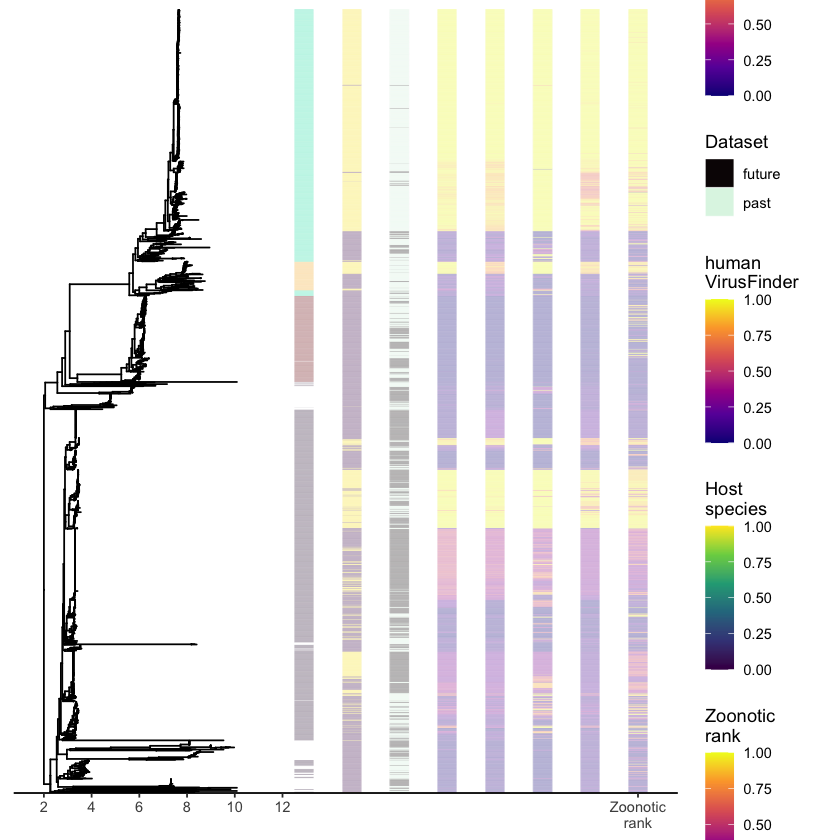

In [50]:
p9